In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
from tensorflow.keras.datasets import cifar10

In [125]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 136s 1us/step


In [145]:
x_test.shape

(10000, 32, 32, 3)

In [133]:
example= x_train[30]

In [134]:
example.shape

(32, 32, 3)

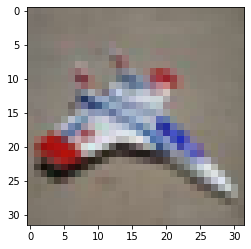

In [135]:
plt.imshow(example)

In [140]:
x_train[0].max()

255

#normalization

In [141]:
x_train=x_train/255

In [142]:
x_test=x_test/255

In [143]:
y_train.shape

(50000, 1)

In [144]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [87]:
# we have to convert the numbers into various categories, it seems numbers to the network. we have to use one hot encoding to convert
# these numbers into categories


In [146]:
from tensorflow.keras.utils import to_categorical
y_cat_train= to_categorical(y_train,  num_classes=10)
y_cat_test= to_categorical(y_test, num_classes=10)


In [148]:
y_cat_train.shape

(50000, 10)

In [149]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [150]:
y_train[1]

array([9], dtype=uint8)

In [151]:
# this is colored image sample

In [152]:
from tensorflow.keras.models import Sequential

In [153]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [154]:
model= Sequential()

model.add(Conv2D(filters= 32, kernel_size= (4,4),strides=(1, 1),padding='valid', input_shape= (32,32,3), activation= 'relu'))
#after convolution layer , there comes a pooling layer. we use maxpool
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size= (4,4),strides=(1, 1),padding='valid', input_shape= (32,32,3), activation= 'relu'))
#after convolution layer , there comes a pooling layer. we use maxpool
model.add(MaxPool2D(pool_size=(2,2)))


#after Pooling we have to flatten the image and then apply the dense layers
model.add(Flatten())


model.add(Dense(256, activation= 'relu'))

#Output layer
model.add(Dense(10, activation= 'softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

# keras.io/metrics to view different options

In [155]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               409856    
_________________________________________________________________
dense_14 (Dense)             (None, 10)              

In [156]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor= 'val_loss', patience=2)

In [157]:
model.fit(x_train, y_cat_train,epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 49s 988us/sample - loss: 1.4621 - accuracy: 0.4714 - val_loss: 1.2544 - val_accuracy: 0.5629
Epoch 2/15
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.1139 - accuracy: 0.6096 - val_loss: 1.0467 - val_accuracy: 0.6366
Epoch 3/15
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.9619 - accuracy: 0.6639 - val_loss: 1.0132 - val_accuracy: 0.6539
Epoch 4/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.8451 - accuracy: 0.7070 - val_loss: 0.9419 - val_accuracy: 0.6777
Epoch 5/15
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.7558 - accuracy: 0.7358 - val_loss: 0.9408 - val_accuracy: 0.6755
Epoch 6/15
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.6651 - accuracy: 0.7664 - val_loss: 0.9716 - val_accuracy: 0.6818
Epoch 7/15
50000/50000 [==============================

In [158]:
metrics= pd.DataFrame(model.history.history)

In [159]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.462099,0.47136,1.254428,0.5629
1,1.113860,0.60960,1.046656,0.6366
2,0.961928,0.66390,1.013208,0.6539
3,0.845070,0.70702,0.941890,0.6777
4,0.755770,0.73576,0.940776,0.6755
5,0.665093,0.76638,0.971572,0.6818
6,0.585713,0.79588,0.989246,0.6827


In [160]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

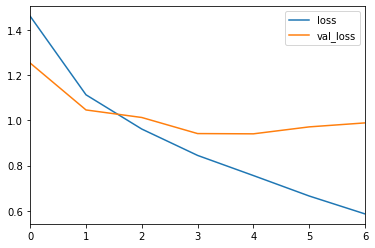

In [161]:
metrics[['loss', 'val_loss']].plot()

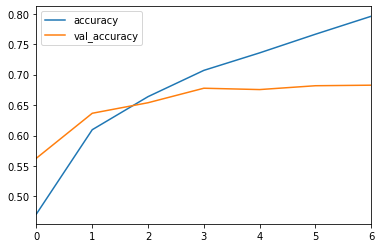

In [162]:
metrics[['accuracy', 'val_accuracy']].plot()

In [163]:
model.evaluate(x_test, y_cat_test, verbose= 0)

[0.9892458403587341, 0.6827]

In [164]:
from sklearn.metrics import confusion_matrix, classification_report

In [165]:
predictions= model.predict_classes(x_test)

In [166]:
predictions.shape

(10000,)

In [167]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1000
           1       0.79      0.79      0.79      1000
           2       0.59      0.58      0.59      1000
           3       0.56      0.40      0.47      1000
           4       0.61      0.68      0.64      1000
           5       0.57      0.59      0.58      1000
           6       0.73      0.80      0.76      1000
           7       0.80      0.69      0.74      1000
           8       0.83      0.70      0.76      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [169]:
print(confusion_matrix(y_test, predictions))

[[768  22  60  16  19   8  11   7  40  49]
 [ 28 793  14   3   4   5   8   0  14 131]
 [ 77   3 585  47  88  75  76  18  11  20]
 [ 22  26  79 404  98 205  79  37  15  35]
 [ 31  10  72  39 675  46  54  49  13  11]
 [ 21  12  68 120  67 593  42  44  13  20]
 [ 13  13  45  37  52  26 796   2   5  11]
 [ 33   5  39  24  83  74  12 688   3  39]
 [128  52  21  15  10   8   5   7 703  51]
 [ 33  70   6  12   4   9   8  11  25 822]]


In [172]:
#viewing results as heatmap
import seaborn as sns


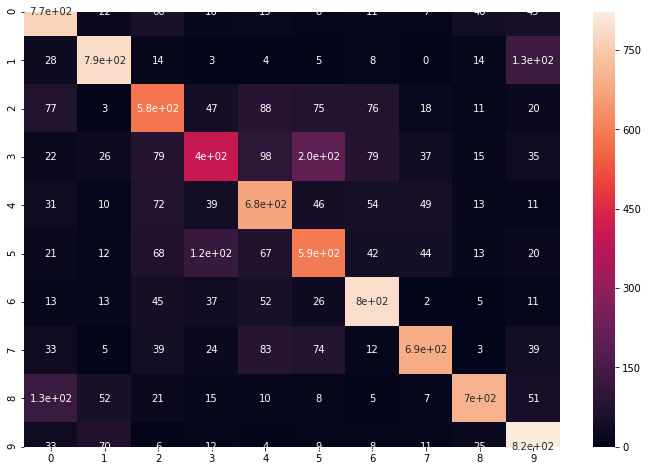

In [173]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [179]:
#prediction
new_image= x_test[16]

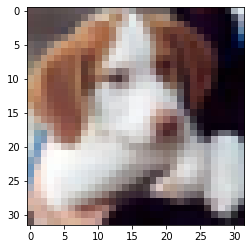

In [180]:
plt.imshow(new_image.reshape(32,32,3))

In [181]:
model.predict_classes(new_image.reshape(1,32,32,3))

array([5], dtype=int64)